In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qmplot import manhattanplot
import re
from numpy.linalg import inv
from pathlib import Path 

In [2]:
df_candidate = pd.read_table("../output_csv/df_candidate.csv", low_memory=False, sep=";")

In [3]:
df_candidate

,chromosome,base_pair_location,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z
0,1,100049785,A,C,-0.2,-0.777778,-1.153846,-0.220779,NaN,-0.662338
1,1,29447886,A,G,NaN,0.782639,NaN,1.292111,NaN,-0.885586
2,1,155041330,T,G,NaN,NaN,NaN,1.046019,NaN,NaN
3,1,62516703,A,T,NaN,NaN,NaN,1.479891,NaN,1.673256
4,1,155002938,A,G,NaN,NaN,NaN,0.188357,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
39873369,24,183143,A,G,NaN,NaN,0.760591,NaN,NaN,NaN
39873370,24,1831072,T,C,NaN,NaN,2.020469,NaN,NaN,NaN
39873371,24,1831021,A,G,NaN,NaN,-0.894581,NaN,NaN,NaN
39873372,24,1832945,A,G,NaN,NaN,-0.632013,NaN,NaN,NaN


In [4]:
df_fi_fg = df_candidate[['fi_z', 'fg_z']]

In [5]:
df_fi_fg = df_fi_fg.dropna()
df_fi_fg

,fi_z,fg_z
0,-0.200000,-0.777778
10,-0.007042,-1.668750
12,0.446623,1.338624
13,-0.077526,0.539474
15,2.616071,-0.863787
...,...,...
39871587,-0.912500,-0.031746
39871588,0.956656,0.311772
39871589,0.250923,0.060890
39871590,-0.810198,-1.294521


In [82]:
df_fi_hba1c = df_candidate[['fi_z', 'hba1c_z']]
df_fi_hba1c = df_fi_hba1c.dropna()
df_fi_hba1c

,fi_z,hba1c_z
0,-0.200000,-1.153846
10,-0.007042,-1.684989
13,-0.077526,0.396694
15,2.616071,0.537671
23,-1.305252,-0.493080
...,...,...
39871587,-0.912500,0.319149
39871588,0.956656,-2.308492
39871589,0.250923,0.216718
39871590,-0.810198,0.626050


In [83]:
df_fi_t2d = df_candidate[['fi_z', 't2d_z']]
df_fi_t2d = df_fi_t2d.dropna()
df_fi_t2d

,fi_z,t2d_z
0,-0.200000,-0.220779
10,-0.007042,-0.629237
12,0.446623,2.100962
13,-0.077526,0.343396
15,2.616071,-0.559252
...,...,...
39049174,0.192308,-0.791209
39049178,-0.148810,-0.776744
39049180,0.450000,-0.385185
39049181,-0.346154,1.595960


In [84]:
df_fi_bmi = df_candidate[['fi_z', 'bmi_z']]
df_fi_bmi = df_fi_bmi.dropna()
df_fi_bmi

,fi_z,bmi_z
156,-0.964286,0.583333
432,-1.285714,-0.823529
441,-2.434783,2.100000
445,-0.363636,-0.473684
512,0.045455,-0.076923
...,...,...
38862407,0.250000,0.200000
38862410,-0.541667,-0.440000
38862420,0.244444,0.240000
38862422,-0.266667,-0.200000


In [85]:
df_fi_gcn = df_candidate[['fi_z', 'gcn_z']]
df_fi_gcn = df_fi_gcn.dropna()
df_fi_gcn

,fi_z,gcn_z
0,-0.200000,-0.662338
15,2.616071,-0.750173
23,-1.305252,-0.017423
28,1.707819,-0.101997
35,0.484032,0.267028
...,...,...
38727166,0.421488,0.033505
38727168,-1.108769,0.650883
38727169,0.379310,0.275449
38727170,0.000000,-0.753358


In [86]:
df_fg_hba1c = df_candidate[['fg_z', 'hba1c_z']]
df_fg_hba1c = df_fg_hba1c.dropna()
df_fg_hba1c

,fg_z,hba1c_z
0,-0.777778,-1.153846
10,-1.668750,-1.684989
13,0.539474,0.396694
15,-0.863787,0.537671
23,-1.374400,-0.493080
...,...,...
39871838,0.764605,0.173170
39871841,0.020870,-0.827650
39871844,-0.031412,-0.045679
39871849,0.034611,0.068025


In [87]:
df_fg_t2d = df_candidate[['fg_z', 't2d_z']]
df_fg_t2d = df_fg_t2d.dropna()
df_fg_t2d

,fg_z,t2d_z
0,-0.777778,-0.220779
1,0.782639,1.292111
6,-1.182513,-0.034468
10,-1.668750,-0.629237
12,1.338624,2.100962
...,...,...
39049177,-0.801478,-0.590527
39049178,-1.038835,-0.776744
39049180,-0.684211,-0.385185
39049181,0.318182,1.595960


In [88]:
df_fg_bmi = df_candidate[['fg_z', 'bmi_z']]
df_fg_bmi = df_fg_bmi.dropna()
df_fg_bmi

,fg_z,bmi_z
156,-1.480000,0.583333
432,0.555556,-0.823529
441,-4.300000,2.100000
445,1.700000,-0.473684
512,0.350000,-0.076923
...,...,...
38862407,0.071429,0.200000
38862410,-0.434783,-0.440000
38862420,0.116279,0.240000
38862422,-0.046512,-0.200000


In [89]:
df_fg_gcn = df_candidate[['fg_z', 'gcn_z']]
df_fg_gcn = df_fg_gcn.dropna()
df_fg_gcn

,fg_z,gcn_z
0,-0.777778,-0.662338
1,0.782639,-0.885586
14,2.357362,-0.797307
15,-0.863787,-0.750173
23,-1.374400,-0.017423
...,...,...
38727166,-0.639344,0.033505
38727168,1.216539,0.650883
38727169,-0.640000,0.275449
38727170,0.336735,-0.753358


In [90]:
df_hba1c_t2d = df_candidate[['hba1c_z', 't2d_z']]
df_hba1c_t2d = df_hba1c_t2d.dropna()
df_hba1c_t2d

,hba1c_z,t2d_z
0,-1.153846,-0.220779
5,1.015500,1.218683
8,0.791688,0.875408
10,-1.684989,-0.629237
13,0.396694,0.343396
...,...,...
39049174,0.000000,-0.791209
39049178,0.547085,-0.776744
39049180,0.714286,-0.385185
39049181,1.285714,1.595960


In [91]:
df_hba1c_bmi = df_candidate[['hba1c_z', 'bmi_z']]
df_hba1c_bmi = df_hba1c_bmi.dropna()
df_hba1c_bmi

,hba1c_z,bmi_z
156,-1.800000,0.583333
432,-0.769231,-0.823529
441,-1.533333,2.100000
445,-1.071429,-0.473684
512,0.068966,-0.076923
...,...,...
38862407,-2.000000,0.200000
38862410,2.193548,-0.440000
38862420,-1.923077,0.240000
38862422,1.678571,-0.200000


In [92]:
df_hba1c_gcn = df_candidate[['hba1c_z', 'gcn_z']]
df_hba1c_gcn = df_hba1c_gcn.dropna()
df_hba1c_gcn

,hba1c_z,gcn_z
0,-1.153846,-0.662338
15,0.537671,-0.750173
23,-0.493080,-0.017423
28,0.560976,-0.101997
35,0.215947,0.267028
...,...,...
38727166,0.329897,0.033505
38727168,0.023713,0.650883
38727169,1.210526,0.275449
38727170,1.506667,-0.753358


In [93]:
df_t2d_bmi = df_candidate[['t2d_z', 'bmi_z']]
df_t2d_bmi = df_t2d_bmi.dropna()
df_t2d_bmi

,t2d_z,bmi_z
156,-0.234783,0.583333
432,0.355263,-0.823529
441,1.850575,2.100000
445,2.073171,-0.473684
512,0.109756,-0.076923
...,...,...
38504517,-0.592105,1.000000
38504519,0.153061,0.909091
38504520,0.193878,0.909091
38504521,-1.447368,-0.666667


In [94]:
df_t2d_gcn = df_candidate[['t2d_z', 'gcn_z']]
df_t2d_gcn = df_t2d_gcn.dropna()
df_t2d_gcn

,t2d_z,gcn_z
0,-0.220779,-0.662338
1,1.292111,-0.885586
3,1.479891,1.673256
14,1.167090,-0.797307
15,-0.559252,-0.750173
...,...,...
38504733,1.434074,1.823476
38504734,0.617234,-1.787078
38504736,0.893121,0.890042
38504737,1.071575,0.356471


In [95]:
df_bmi_gcn = df_candidate[['bmi_z', 'gcn_z']]
df_bmi_gcn = df_bmi_gcn.dropna()
df_bmi_gcn

,bmi_z,gcn_z
156,0.583333,0.692568
432,-0.823529,1.056338
441,2.100000,-1.800866
445,-0.473684,-1.318966
512,-0.076923,-0.444181
...,...,...
38727125,-0.369565,-1.609223
38727135,0.055556,0.920561
38727136,-0.130435,-1.765306
38727140,0.111111,0.437500


In [96]:
df_fi = df_candidate[['fi_z']]
df_fi = df_fi.dropna()
df_fi

,fi_z
0,-0.200000
10,-0.007042
12,0.446623
13,-0.077526
15,2.616071
...,...
39871587,-0.912500
39871588,0.956656
39871589,0.250923
39871590,-0.810198


In [97]:
df_fg = df_candidate[['fg_z']]
df_fg = df_fg.dropna()
df_fg

,fg_z
0,-0.777778
1,0.782639
6,-1.182513
10,-1.668750
12,1.338624
...,...
39871849,0.034611
39871850,1.233293
39871851,0.035022
39871852,-1.188843


In [98]:
df_hba1c = df_candidate[['hba1c_z']]
df_hba1c = df_hba1c.dropna()
df_hba1c

,hba1c_z
0,-1.153846
5,1.015500
8,0.791688
10,-1.684989
13,0.396694
...,...
39873369,0.760591
39873370,2.020469
39873371,-0.894581
39873372,-0.632013


In [99]:
df_t2d = df_candidate[['t2d_z']]
df_t2d = df_t2d.dropna()
df_t2d

,t2d_z
0,-0.220779
1,1.292111
2,1.046019
3,1.479891
4,0.188357
...,...
39049178,-0.776744
39049179,-0.336957
39049180,-0.385185
39049181,1.595960


In [100]:
df_bmi = df_candidate[['bmi_z']]
df_bmi = df_bmi.dropna()
df_bmi

,bmi_z
156,0.583333
432,-0.823529
441,2.100000
445,-0.473684
512,-0.076923
...,...
38862407,0.200000
38862410,-0.440000
38862420,0.240000
38862422,-0.200000


In [101]:
df_gcn = df_candidate[['gcn_z']]
df_gcn = df_gcn.dropna()
df_gcn

,gcn_z
0,-0.662338
1,-0.885586
3,1.673256
14,-0.797307
15,-0.750173
...,...
38727167,0.294908
38727168,0.650883
38727169,0.275449
38727170,-0.753358


In [32]:
df_fi_fg[['fi_z', 'fg_z']]

,fi_z,fg_z
0,-0.200000,-0.777778
10,-0.007042,-1.668750
12,0.446623,1.338624
13,-0.077526,0.539474
15,2.616071,-0.863787
...,...,...
39871587,-0.912500,-0.031746
39871588,0.956656,0.311772
39871589,0.250923,0.060890
39871590,-0.810198,-1.294521


In [102]:
def calculate_correlation(t1, t2):
    c_ij = np.cov(t1.to_numpy(),  t2.to_numpy())
    c_ii = np.cov(t1.to_numpy(),  t1.to_numpy())
    c_jj = np.cov(t2.to_numpy(),  t2.to_numpy())
    Rij = c_ij/np.sqrt(c_ii * c_jj)
    return Rij

In [103]:
cor_fi = calculate_correlation(df_fi.fi_z, df_fi.fi_z)
cor_fi

array([[1., 1.],
       [1., 1.]])

In [104]:
cor_fg = calculate_correlation(df_fg.fg_z, df_fg.fg_z)
cor_fg

array([[1., 1.],
       [1., 1.]])

In [105]:
cor_hba1c = calculate_correlation(df_hba1c.hba1c_z, df_hba1c.hba1c_z)
cor_hba1c

array([[1., 1.],
       [1., 1.]])

In [106]:
cor_t2d = calculate_correlation(df_t2d.t2d_z, df_t2d.t2d_z)
cor_t2d

array([[1., 1.],
       [1., 1.]])

In [107]:
cor_bmi = calculate_correlation(df_bmi.bmi_z, df_bmi.bmi_z)
cor_bmi

array([[1., 1.],
       [1., 1.]])

In [108]:
cor_gcn = calculate_correlation(df_gcn.gcn_z, df_gcn.gcn_z)
cor_gcn

array([[1., 1.],
       [1., 1.]])

In [109]:
cor_fi_fg = calculate_correlation(df_fi_fg.fi_z, df_fi_fg.fg_z)
cor_fi_fg

array([[1.04282847, 0.19626832],
       [0.19626832, 0.95893048]])

In [110]:
cor_fg_fi = calculate_correlation(df_fi_fg.fg_z, df_fi_fg.fi_z)
cor_fg_fi

array([[0.95893048, 0.19626832],
       [0.19626832, 1.04282847]])

In [111]:
cor_fi_hba1c = calculate_correlation(df_fi_hba1c.fi_z, df_fi_hba1c.hba1c_z)
cor_fi_hba1c

array([[1.04879728, 0.04210314],
       [0.04210314, 0.95347311]])

In [112]:
cor_fi_t2d = calculate_correlation(df_fi_t2d.fi_z, df_fi_t2d.t2d_z)
cor_fi_t2d

array([[1.04764018, 0.0543323 ],
       [0.0543323 , 0.9545262 ]])

In [49]:
cor_fi_bmi = calculate_correlation(df_fi_bmi.fi_z, df_fi_bmi.bmi_z)
cor_fi_bmi

array([[ 0.54740256, -0.05111578],
       [-0.05111578,  1.82680916]])

In [50]:
cor_fi_gcn = calculate_correlation(df_fi_gcn.fi_z, df_fi_gcn.gcn_z)
cor_fi_gcn

array([[1.07369956, 0.01468997],
       [0.01468997, 0.93135924]])

In [51]:
cor_fg_hba1c = calculate_correlation(df_fg_hba1c.fg_z, df_fg_hba1c.hba1c_z)
cor_fg_hba1c

array([[1.00518035, 0.12033641],
       [0.12033641, 0.99484635]])

In [52]:
cor_fg_t2d = calculate_correlation(df_fg_t2d.fg_z, df_fg_t2d.t2d_z)
cor_fg_t2d

array([[1.07451642, 0.12328831],
       [0.12328831, 0.93065121]])

In [53]:
cor_fg_bmi = calculate_correlation(df_fg_bmi.fg_z, df_fg_bmi.bmi_z)
cor_fg_bmi

array([[ 0.57407463, -0.02920482],
       [-0.02920482,  1.74193378]])

In [54]:
cor_fg_gcn = calculate_correlation(df_fg_gcn.fg_z, df_fg_gcn.gcn_z)
cor_fg_gcn

array([[ 1.07683546, -0.00171142],
       [-0.00171142,  0.92864698]])

In [55]:
cor_hba1c_t2d = calculate_correlation(df_hba1c_t2d.hba1c_z, df_hba1c_t2d.t2d_z)
cor_hba1c_t2d

array([[1.05774517, 0.11568062],
       [0.11568062, 0.9454073 ]])

In [56]:
cor_hba1c_bmi = calculate_correlation(df_hba1c_bmi.hba1c_z, df_hba1c_bmi.bmi_z)
cor_hba1c_bmi

array([[0.56705084, 0.08638812],
       [0.08638812, 1.76351032]])

In [59]:
cor_hba1c_gcn = calculate_correlation(df_hba1c_gcn.hba1c_z, df_hba1c_gcn.gcn_z)
cor_hba1c_gcn

array([[1.07715773, 0.0039523 ],
       [0.0039523 , 0.92836915]])

In [60]:
cor_t2d_bmi = calculate_correlation(df_t2d_bmi.t2d_z, df_t2d_bmi.bmi_z)
cor_t2d_bmi

array([[0.54948135, 0.25044779],
       [0.25044779, 1.81989797]])

In [61]:
cor_t2d_gcn = calculate_correlation(df_t2d_gcn.t2d_z, df_t2d_gcn.gcn_z)
cor_t2d_gcn

array([[ 1.15828749e+00, -2.79826013e-04],
       [-2.79826013e-04,  8.63343523e-01]])

In [62]:
cor_bmi_gcn = calculate_correlation(df_bmi_gcn.bmi_z, df_bmi_gcn.gcn_z)
cor_bmi_gcn

array([[1.9898535 , 0.02328281],
       [0.02328281, 0.50254956]])

In [64]:
cor_bmi_gcn[0][1]

0.023282813058068407

In [65]:
cor_m = []
cor_m.append([cor_fi[0][1], cor_fi_fg[0][1], cor_fi_hba1c[0][1], cor_fi_t2d[0][1], cor_fi_bmi[0][1], cor_fi_gcn[0][1]])
cor_m.append([cor_fi_fg[0][1], cor_fg[0][1], cor_fg_hba1c[0][1], cor_fg_t2d[0][1], cor_fg_bmi[0][1], cor_fg_gcn[0][1]])
cor_m.append([cor_fi_hba1c[0][1], cor_fg_hba1c[0][1], cor_hba1c[0][1], cor_hba1c_t2d[0][1], cor_hba1c_bmi[0][1], cor_hba1c_gcn[0][1]])
cor_m.append([cor_fi_t2d[0][1], cor_fg_t2d[0][1], cor_hba1c_t2d[0][1], cor_t2d[0][1], cor_t2d_bmi[0][1], cor_t2d_gcn[0][1]])
cor_m.append([cor_fi_bmi[0][1], cor_fg_bmi[0][1], cor_hba1c_bmi[0][1], cor_t2d_bmi[0][1], cor_bmi[0][1], cor_bmi_gcn[0][1]])
cor_m.append([cor_fi_gcn[0][1], cor_fg_gcn[0][1], cor_hba1c_gcn[0][1], cor_t2d_gcn[0][1], cor_bmi_gcn[0][1], cor_gcn[0][1]])

In [72]:
cor_m

[[1.0,
  0.19626831961499439,
  0.04210314483045394,
  0.05433230184780799,
  -0.051115780233111086,
  0.014689970103174632],
 [0.19626831961499439,
  1.0,
  0.1203364059195683,
  0.1232883106721572,
  -0.02920481908115594,
  -0.001711421079456731],
 [0.04210314483045394,
  0.1203364059195683,
  1.0,
  0.11568062132528861,
  0.08638811895633078,
  0.0039522998319580956],
 [0.05433230184780799,
  0.1232883106721572,
  0.11568062132528861,
  1.0,
  0.250447786190164,
  -0.0002798260130662401],
 [-0.051115780233111086,
  -0.02920481908115594,
  0.08638811895633078,
  0.250447786190164,
  1.0,
  0.023282813058068407],
 [0.014689970103174632,
  -0.001711421079456731,
  0.0039522998319580956,
  -0.0002798260130662401,
  0.023282813058068407,
  1.0]]

In [73]:
np.savetxt('correlation.txt', cor_m)

In [74]:
np.array(cor_m).flatten()

array([ 1.00000000e+00,  1.96268320e-01,  4.21031448e-02,  5.43323018e-02,
       -5.11157802e-02,  1.46899701e-02,  1.96268320e-01,  1.00000000e+00,
        1.20336406e-01,  1.23288311e-01, -2.92048191e-02, -1.71142108e-03,
        4.21031448e-02,  1.20336406e-01,  1.00000000e+00,  1.15680621e-01,
        8.63881190e-02,  3.95229983e-03,  5.43323018e-02,  1.23288311e-01,
        1.15680621e-01,  1.00000000e+00,  2.50447786e-01, -2.79826013e-04,
       -5.11157802e-02, -2.92048191e-02,  8.63881190e-02,  2.50447786e-01,
        1.00000000e+00,  2.32828131e-02,  1.46899701e-02, -1.71142108e-03,
        3.95229983e-03, -2.79826013e-04,  2.32828131e-02,  1.00000000e+00])

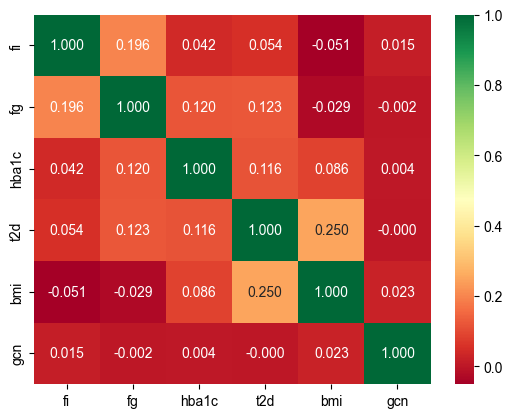

In [75]:
import seaborn as sns
labels = (np.asarray(["{0:.3f}".format(value)
                      for value in np.array(cor_m).flatten()])
         ).reshape(6, 6)

fig, ax = plt.subplots()
ticklabels = ['fi', 'fg', 'hba1c', 't2d', 'bmi', 'gcn']
sns.heatmap(cor_m, annot=labels, fmt="", cmap='RdYlGn', ax=ax, yticklabels = ticklabels, xticklabels = ticklabels)
plt.savefig('../output_figs/fig3_correlation.png')
plt.show()